In [221]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import fpfs
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt
import numpy.lib.recfunctions as rfn
from default import *

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

ver='try2'
gver='unif_cosmo085'
dver='cut32'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [211]:
# read noiseless data
nver='var7em3' 
mm1=[]
mm2=[]
for _i in range(0,200):
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    _a2=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-2222.fits' %(gver,nver,ver,dver,_i)))
    mm1.append(_a1)
    mm2.append(_a2)
    del _a1,_a2#,msk1,msk2
mm1 =   rfn.stack_arrays(mm1,usemask=False)
mm2 =   rfn.stack_arrays(mm2,usemask=False)
gc.collect()

Const  =   20.
noirev =   True
ellM1  =   fpfs.catalog.fpfsM2E(mm1,const=Const,noirev=noirev)
ellM2  =   fpfs.catalog.fpfsM2E(mm2,const=Const,noirev=noirev)
gc.collect()

0

In [222]:
fs1=fpfs.catalog.summary_stats(mm1,ellM1,use_sig=False)
selnm=['M00','R2','R2_upp','detect']
cutsig=[sigM,sigR,sigR,sigP]

# clean outcome
fs1.clear_outcomes()
cut=[10**((27.-cutM)/2.5),cutR,cutRU,cutP]
# weight array
fs1.update_selection_weight(selnm,cut,cutsig)

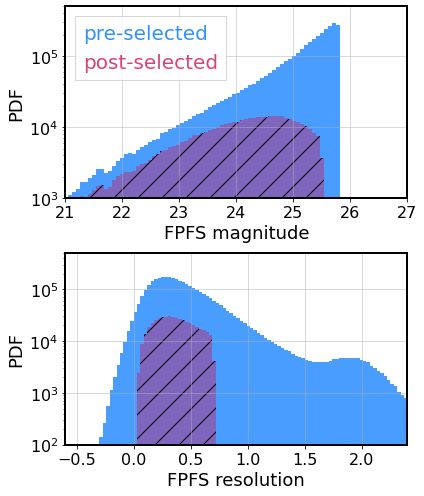

In [228]:
precut= -0.12
nbins=   100
m1   =   -2.5 * np.log10(mm1['fpfs_M00']) + 27.
r2   =   (mm1['fpfs_M20']+mm1['fpfs_M00'])/(mm1['fpfs_M00'])
msk=(mm1['fpfs_v0']>precut)&(mm1['fpfs_v2']>precut)&(mm1['fpfs_v4']>precut)&(mm1['fpfs_v6']>precut)
msk=msk&(mm1['fpfs_v1']>precut)&(mm1['fpfs_v3']>precut)&(mm1['fpfs_v5']>precut)&(mm1['fpfs_v7']>precut)
msk=msk&(m1<25.8)
plt.close()
fig,axes=pltutil.make_figure_axes(nx=1,ny=2,square=False)
ax=axes[0]
ax.hist(m1[msk],bins=nbins,density=False,linewidth=2.,color=pltutil.colors[1],range=(20,27),\
        label='pre-selected',alpha=0.8,histtype='stepfilled')
ax.hist(m1,bins=nbins,density=False,weights=fs1.ws,linewidth=2.,color=pltutil.colors[2],range=(20,27),\
        label='post-selected',alpha=0.4,histtype='stepfilled',hatch='/')

leg=ax.legend(loc='upper left',fontsize=20,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
for it,text in enumerate(leg.get_texts()):
    text.set_color(pltutil.colors[it+1])
ax.set_xlim(21,27)
ax.set_ylim(1e3,5e5)
ax.set_yscale('log')
ax.set_xlabel('FPFS magnitude')
ax.set_ylabel('PDF')
ax.grid()

ax=axes[1]
ax.hist(r2[msk],bins=nbins,density=False,linewidth=2.,color=pltutil.colors[1],range=(-0.6,2.4),\
        alpha=0.8,histtype='stepfilled')
ax.hist(r2,bins=nbins,density=False,weights=fs1.ws,linewidth=2.,\
        color=pltutil.colors[2],range=(-0.6,2.4),\
        alpha=0.4,histtype='stepfilled',hatch='/')
ax.set_xlim(-0.6,2.4)
ax.set_ylim(1e2,5e5)
ax.set_yscale('log')
ax.set_xlabel('FPFS resolution')
ax.set_ylabel('PDF')
ax.grid()
fig.tight_layout()


gc.collect()
fig.savefig('obsHist_blend_det.pdf')

In [224]:
fs2=fpfs.catalog.summary_stats(mm1,ellM1,use_sig=False)
selnm=['M00','R2','detect']
cutsig=[sigM,sigR,sigP]

# clean outcome
fs2.clear_outcomes()
cut=[10**((27.-cutM)/2.5),cutR,cutP]
# weight array
fs2.update_selection_weight(selnm,cut,cutsig)

In [225]:
pix_scale=0.168
r2=2300**2.
area=r2*np.pi*pix_scale**2./3600.
print(np.sum(msk)/200./area)
print(np.sum(fs2.ws)/200/area)
print(np.sum(fs1.ws)/200/area)

132.33281307082314
21.029048776087915
17.95011122483053


In [173]:
len(ms)/200./area

356.84187905734984

(array([   363.,    491.,    514.,    577.,    692.,    859.,    981.,
          1174.,   1570.,   1940.,   2701.,   3653.,   5181.,   7966.,
         12286.,  17691.,  23717.,  30201.,  38114.,  46150.,  53991.,
         62582.,  70386.,  79084.,  87689.,  95106., 103304., 111878.,
        119869., 128608., 136677., 145158., 153173., 160548., 170034.,
        178516., 187924., 195899., 203605., 210592., 216116., 221764.,
        227918., 230204., 233775., 235904., 236973., 234816., 230794.,
        227494., 221257., 215614., 209352., 202033., 193723., 184790.,
        177900., 169360., 160813., 153318., 144966., 137683., 130589.,
        122235., 114770., 107387., 100398.,  92638.,  85079.,  77760.,
         70904.,  64665.,  57952.,  52595.,  48025.,  43347.,  38897.,
         35679.,  32297.,  29937.,  27805.,  25892.,  23889.,  22033.,
         20543.,  19333.,  18089.,  16895.,  15989.,  15104.,  14208.,
         13387.,  12859.,  12010.,  11524.,  10851.,  10302.,   9863.,
      

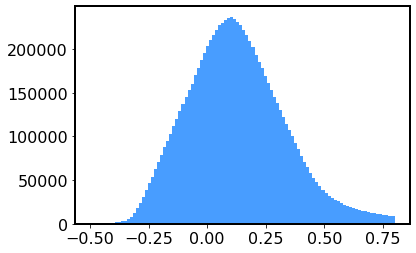

In [114]:
plt.hist(mm1['fpfs_v1'],bins=nbins,density=False,linewidth=2.,color=pltutil.colors[1],range=(-0.5,0.8),\
        label='pre selected',alpha=0.8,histtype='stepfilled')